In [43]:
#Importing Libraries

In [5]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [45]:
#Extract Filenames from Folder

In [6]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [7]:
len(filenames)

44441

In [8]:
#Importing ResNet50 Model and Cofiguration

In [10]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [50]:
#Extracting Fetaures from Image

In [11]:
img = image.load_img('1833.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.00267127, 0.        , 0.02494032, ..., 0.02122807, 0.03441674,
       0.02485588], dtype=float32)

In [12]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [13]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


array([0.        , 0.01761617, 0.00171608, ..., 0.01247239, 0.02726404,
       0.06899218], dtype=float32)

In [14]:
image_features = []
for file in filenames[0:2000]:  # Loop through all images
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.01761617, 0.00171608, ..., 0.01247239, 0.02726404,
        0.06899218], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375535,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710438, ..., 0.00140771, 0.        ,
        0.05435038], dtype=float32),
 array([0.00232165, 0.05030548, 0.00747743, ..., 0.00346684, 0.03391017,
        0.04565745], dtype=float32),
 array([0.00306835, 0.0624045 , 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.1046912 , 0.0019809 , ..., 0.        , 0.03033772,
        0.02712848], dtype=float32),
 array([0.        , 0.1243846 , 0.01465613, ..., 0.00289705, 0.0405516 ,
        0.06534588], dtype=float32),
 array([0.        , 0.09169203, 0.0156991 , ..., 0.        , 0.0050358 ,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545277, 0.01153319, ..., 0.00073008, 0.04513266,
        0.07661069], dtype=float32),
 array([0.

In [18]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [19]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [99]:
#Loading Pickle Files

In [20]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [21]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [22]:
np.array(Image_features).shape

(2000, 2048)

In [16]:
#Finidng Simialar Images

In [23]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')



In [24]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [25]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


In [26]:
distance,indices = neighbors.kneighbors([input_image])

In [35]:
indices[0]

array([ 519,  525,  520, 1536, 1975, 1543])

In [28]:
from IPython.display import Image

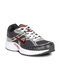

In [29]:
Image('1833.jpg')

In [30]:
filenames[indices[0][0]]

'images\\10618.jpg'

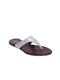

In [31]:
Image(filenames[indices[0][2]])

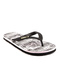

In [32]:
Image(filenames[indices[0][3]])

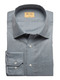

In [33]:
Image(filenames[indices[0][4]])

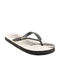

In [34]:
Image(filenames[indices[0][5]])